
# Machine Learning

# MOBILE PRICE CLASSIFICATION

### Importing Packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Loading dataset

In [2]:
df = pd.read_csv('train.csv')

In [57]:
df.shape

(2000, 21)

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Correlation between columns

Text(0.5, 1.0, 'Correlation ')

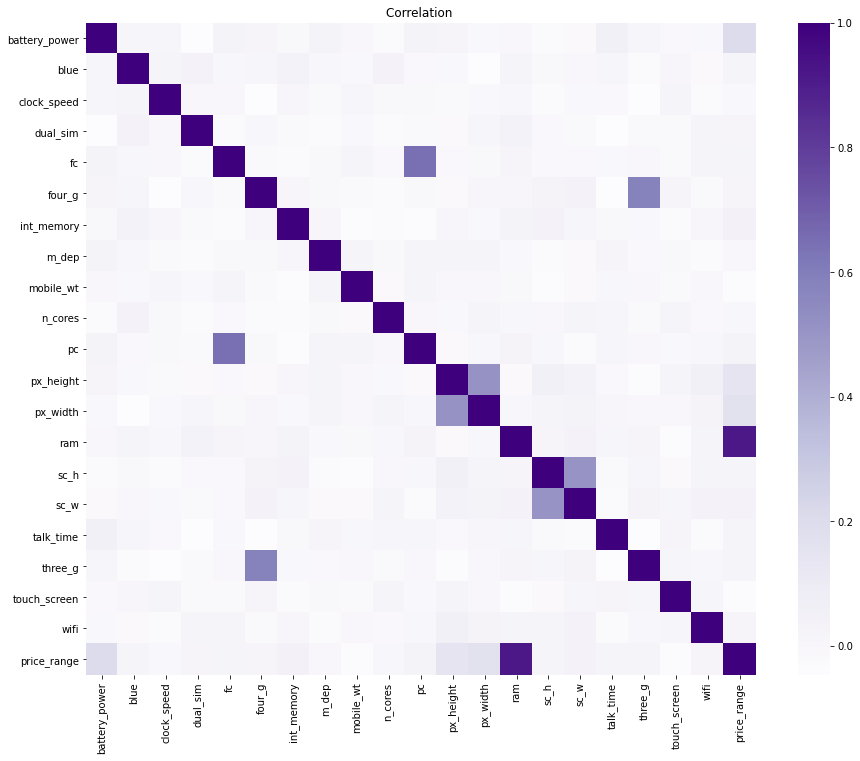

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

### Splitting the Data

In [5]:
y = df["price_range"].values
x=df.drop(["price_range"],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

## Algorithms

## SVM

In [7]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [8]:
pred = svm.predict(x_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
print(confusion_matrix(y_test,pred))

[[91  1  0  0]
 [ 3 91  2  0]
 [ 0  7 96  3]
 [ 0  0  7 99]]


In [11]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        92
           1       0.92      0.95      0.93        96
           2       0.91      0.91      0.91       106
           3       0.97      0.93      0.95       106

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [37]:
svm_test=pd.DataFrame(y_test)
svm_test = svm_test.rename(columns = {0: 'price_range'}, inplace = False)
svm_test['price_pred'] = pd.DataFrame(pred)
svm_test

,price_range,price_pred
0,0,0
1,0,0
2,1,1
3,1,0
4,2,3
...,...,...
395,2,2
396,3,3
397,3,3
398,1,1


<AxesSubplot:xlabel='price_range', ylabel='count'>

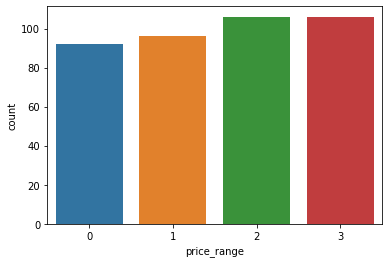

In [43]:
sns.countplot(x='price_range',data=svm_test)

<AxesSubplot:xlabel='price_pred', ylabel='count'>

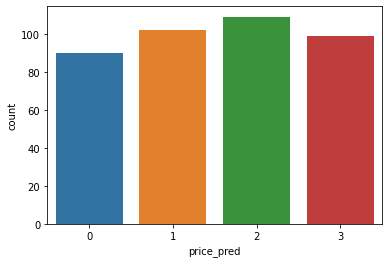

In [44]:
sns.countplot(x='price_pred',data=svm_test)

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
knn_pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))

[[86  6  0  0]
 [ 4 89  3  0]
 [ 0  7 90  9]
 [ 0  0 16 90]]


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        92
           1       0.87      0.93      0.90        96
           2       0.83      0.85      0.84       106
           3       0.91      0.85      0.88       106

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [49]:
knn_test=pd.DataFrame(y_test)
knn_test = svm_test.rename(columns = {0: 'price_range'}, inplace = False)
knn_test['price_pred'] = pd.DataFrame(knn_pred)
knn_test

,price_range,price_pred
0,0,0
1,0,2
2,1,0
3,1,0
4,2,1
...,...,...
395,2,2
396,3,2
397,3,3
398,1,2


<AxesSubplot:xlabel='price_pred', ylabel='count'>

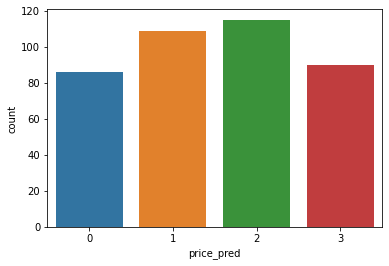

In [50]:
sns.countplot(x='price_pred',data=knn_test)

## Naive bayes

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [20]:
y_pred  =  classifier.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print('accuracy score: ',ac)

[[79 13  0  0]
 [11 66 19  0]
 [ 0 21 72 13]
 [ 0  1 19 86]]
accuracy score:  0.7575


In [51]:
naive_test=pd.DataFrame(y_test)
naive_test = svm_test.rename(columns = {0: 'price_range'}, inplace = False)
naive_test['price_pred'] = pd.DataFrame(y_pred)
naive_test

,price_range,price_pred
0,0,0
1,0,1
2,1,1
3,1,0
4,2,3
...,...,...
395,2,2
396,3,3
397,3,3
398,1,1


<AxesSubplot:xlabel='price_pred', ylabel='count'>

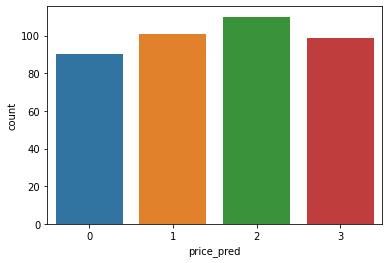

In [53]:
sns.countplot(x='price_pred',data=naive_test)

<AxesSubplot:xlabel='price_range', ylabel='count'>

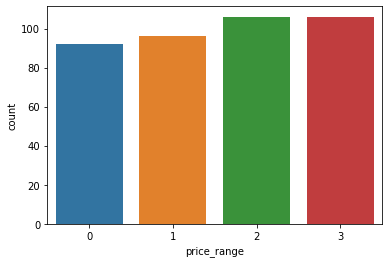

In [54]:
sns.countplot(x='price_range',data=knn_test)